In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
def show(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.show()

# 图像模糊
# 1.卷积
- 或称滤波器，算子

In [3]:
img = np.ones((5,5))
kernel = np.ones((3,3))

print(img)
print(kernel)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [4]:
img2 = cv.filter2D(img,-1,kernel) #第二个参数写-1，ddepth如果使用-1，则结果（目标）图像将与输入（源）图像具有相同的深度。
print(img2)

[[9. 9. 9. 9. 9.]
 [9. 9. 9. 9. 9.]
 [9. 9. 9. 9. 9.]
 [9. 9. 9. 9. 9.]
 [9. 9. 9. 9. 9.]]


# 2.均值滤波

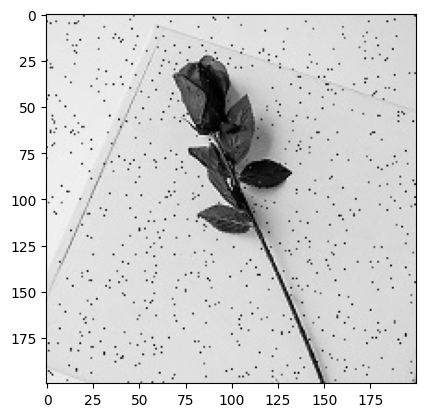

In [5]:
img = cv.imread("pic/rose_spnoise_200x200.jpg")
show(img)

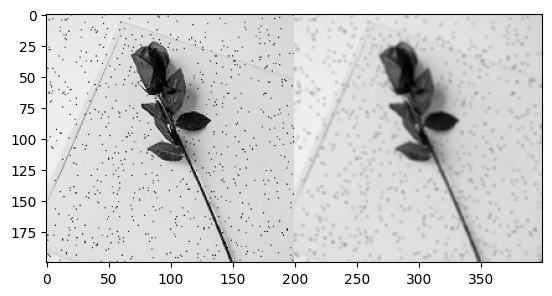

In [6]:
K = np.ones((3,3))/9

img1 = cv.filter2D(img,-1,K)
show(np.hstack([img,img1]))

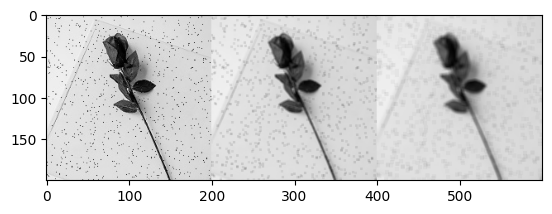

In [7]:
#均值滤波的函数
#cv.blur(img,(5,5))
#cv.boxFilter(img,-1,(5,5))
#这两个函数功能一致，第一个用的多一点

img2 = cv.blur(img,(5,5))
show(np.hstack([img,img1,img2]))

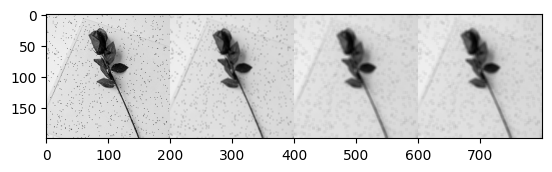

In [8]:
img3 = cv.boxFilter(img,-1,(5,5))
show(np.hstack([img,img1,img2,img3]))


# 3.中值滤波

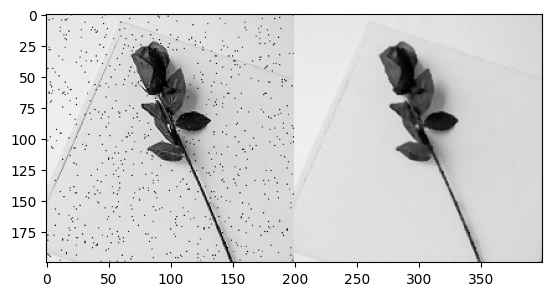

In [10]:
img4 = cv.medianBlur(img,3)
show(np.hstack([img,img4]))

# 4.高斯滤波

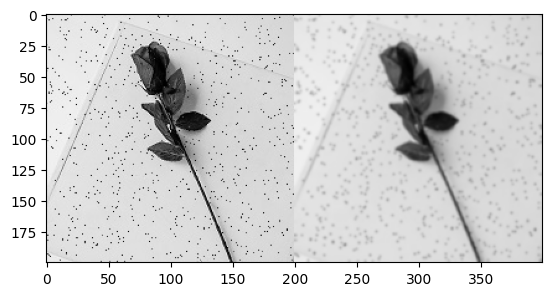

In [16]:
#sigma一般设置为1，中心权值大，往四周延伸权值越来越小
#sigma上升，趋近于均值滤波
#sigma下降->0,趋近于没有滤波效果
img5 = cv.GaussianBlur(img,(5,5),sigmaX=1)#sigmaY默认等于sigmaX，所以只需设置sigmaX
show(np.hstack([img,img5]))



# 5.双边滤波
- 保留边缘等高频信息，平滑颜色（灰度）相近的地方
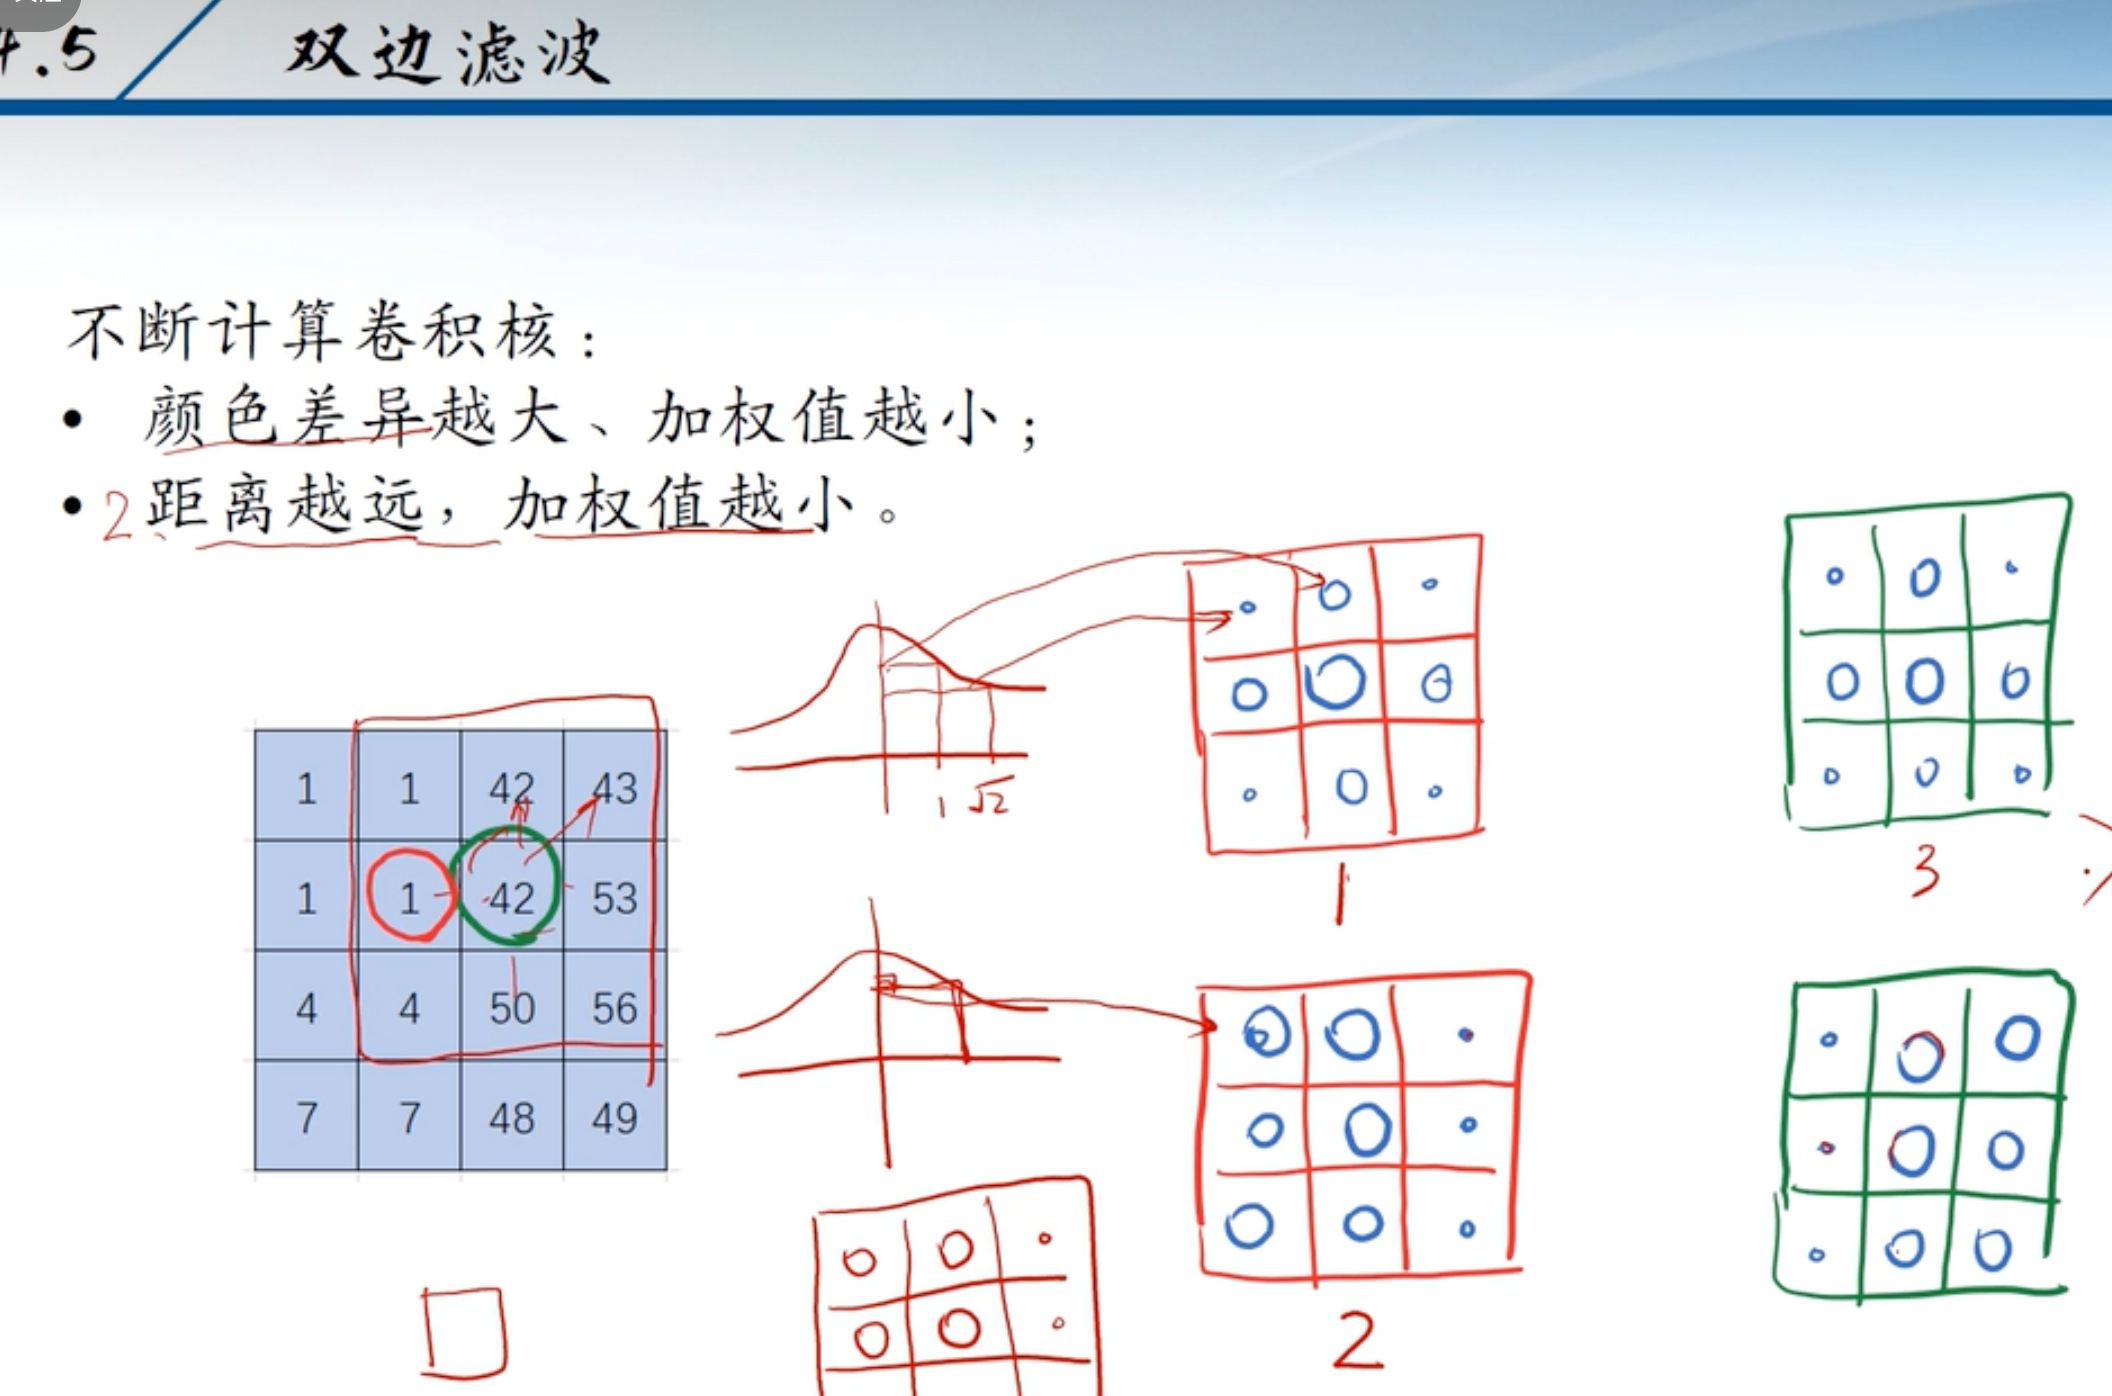

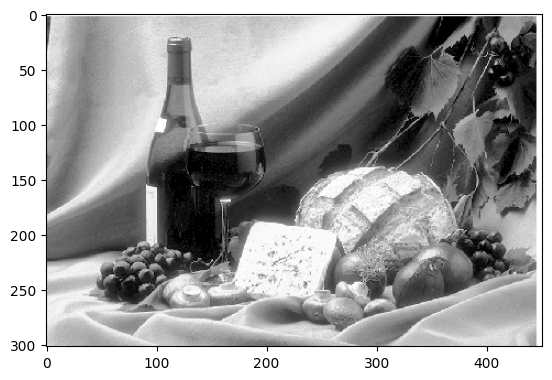

In [18]:
img = cv.imread("pic/beer.jpg",0)
show(img)

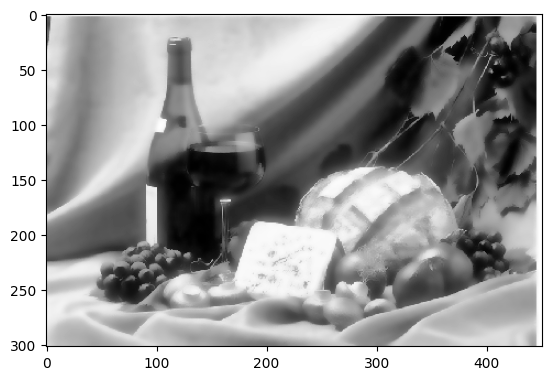

In [19]:
img2 = cv.bilateralFilter(img,-1,sigmaColor=50,sigmaSpace=3)
show(img2)

# 6.双边滤波实现

$$
c(\xi - x) = e^{-0.5(\frac{\lVert \xi-x \rVert}{\sigma_d})^2}
$$

In [21]:
def get_C(sigmad, n):
    C = np.zeros((n,n))
    
    # 0, 1, 2
    x = np.array([n//2, n//2])
    for i in range(n):
        for j in range(n):
            ksi = np.array([i, j])
            C[i,j] = np.exp(-0.5 * (np.linalg.norm(ksi - x) / sigmad)**2) #linalg->linear algorithm
            
    C /= C.sum()
    return C

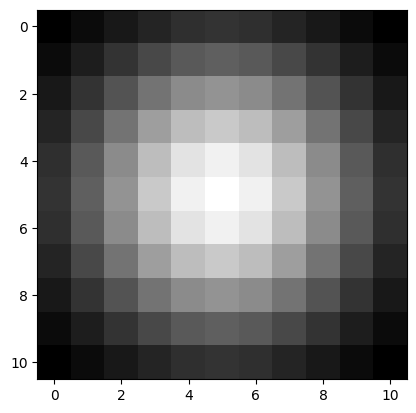

In [26]:
out = get_C(3,11)
show(out)

$$
s(f(\xi)- f(x)) = e^{-0.5(\frac{\lVert f(\xi)-f(x) \rVert}{\sigma_r})^2}
$$

In [28]:
def get_S(f, sigmar, n):
    S = np.zeros((n,n))
    
    f = np.float64(f)
    for i in range(n):
        for j in range(n):
            S[i,j] = np.exp(-0.5 * ((f[i,j] - f[n//2, n//2]) / sigmar)**2)
            
    S /= S.sum()#归一化
    return S

In [30]:
def get_S2(f, sigmar, n):
    f = np.float64(f)
    
    S = np.exp(-0.5 * ((f - f[n//2, n//2]) / sigmar)**2)
            
    S /= S.sum()
    return S

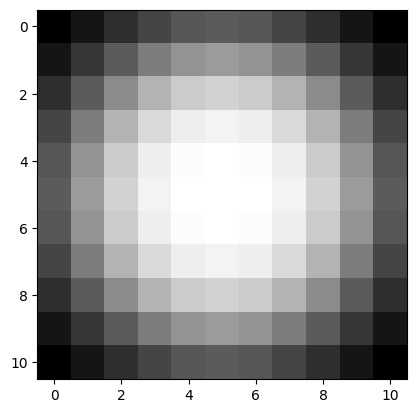

In [32]:
S2 = get_S2(out, 10, 11)
show(S2)

In [33]:
sigmar = 50
sigmad = 3
n = 11

h, w = img.shape
img2 = np.zeros_like(img)

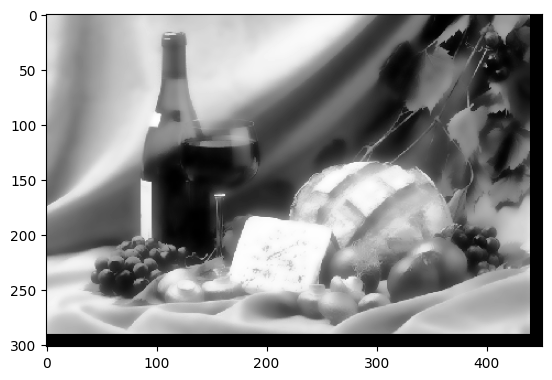

CPU times: user 1.33 s, sys: 19.6 ms, total: 1.35 s
Wall time: 1.2 s


In [34]:
%%time


C = get_C(sigmad, n)

for i in range(h-n):
    for j in range(w-n):
        f = img[i:i+n, j:j+n]
        S = get_S2(f, sigmar, n)
        K = C * S
        K /= K.sum()
        img2[i,j] = (f * K).sum()

show(img2)

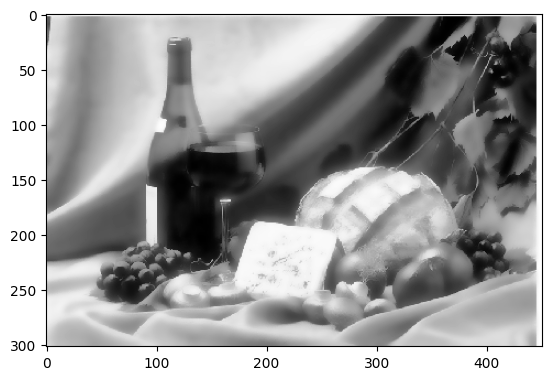

CPU times: user 288 ms, sys: 4.71 ms, total: 293 ms
Wall time: 123 ms


In [35]:
%%time

img3 = cv.bilateralFilter(img, 11, sigmaColor=50, sigmaSpace=3)
show(img3)

In [37]:
cv.imwrite('pic/test/bilateral.jpg', np.hstack([img, img2, img3]).astype(np.uint8))

True